In [199]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [200]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [201]:
babies=pd.read_csv('Babies1.csv')
babies

,headcirc,length,gestage,birthwt,momage,toxemia,sbp,sex,grmhrm,apgar5
0,27,41,29,1360,37,0,43,Male,No,7
1,29,40,31,1490,34,0,51,Male,No,8
2,30,38,33,1490,32,0,42,Female,No,0
3,28,38,31,1180,37,0,39,Female,No,8
4,29,38,30,1200,29,1,48,Female,No,7
...,...,...,...,...,...,...,...,...,...,...
95,26,37,31,820,30,1,51,Female,Yes,6
96,27,40,29,1150,28,0,52,Male,No,8
97,28,35,32,880,35,1,47,Male,No,5
98,28,41,33,1320,36,1,40,Female,No,8


In [202]:
babies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headcirc  100 non-null    int64 
 1   length    100 non-null    int64 
 2   gestage   100 non-null    int64 
 3   birthwt   100 non-null    int64 
 4   momage    100 non-null    int64 
 5   toxemia   100 non-null    int64 
 6   sbp       100 non-null    int64 
 7   sex       100 non-null    object
 8   grmhrm    100 non-null    object
 9   apgar5    100 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 7.9+ KB


In [203]:
grmhrmD=pd.get_dummies(babies["grmhrm"],prefix="grmhrmD",drop_first=True)
grmhrmD

,grmhrmD_Yes
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,0
97,0
98,0


In [204]:
babies=pd.concat([babies,grmhrmD],axis=1)
babies

,headcirc,length,gestage,birthwt,momage,toxemia,sbp,sex,grmhrm,apgar5,grmhrmD_Yes
0,27,41,29,1360,37,0,43,Male,No,7,0
1,29,40,31,1490,34,0,51,Male,No,8,0
2,30,38,33,1490,32,0,42,Female,No,0,0
3,28,38,31,1180,37,0,39,Female,No,8,0
4,29,38,30,1200,29,1,48,Female,No,7,0
...,...,...,...,...,...,...,...,...,...,...,...
95,26,37,31,820,30,1,51,Female,Yes,6,1
96,27,40,29,1150,28,0,52,Male,No,8,0
97,28,35,32,880,35,1,47,Male,No,5,0
98,28,41,33,1320,36,1,40,Female,No,8,0


In [228]:
babies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headcirc     100 non-null    int64 
 1   length       100 non-null    int64 
 2   gestage      100 non-null    int64 
 3   birthwt      100 non-null    int64 
 4   momage       100 non-null    int64 
 5   toxemia      100 non-null    int64 
 6   sbp          100 non-null    int64 
 7   sex          100 non-null    object
 8   grmhrm       100 non-null    object
 9   apgar5       100 non-null    int64 
 10  grmhrmD_Yes  100 non-null    uint8 
dtypes: int64(8), object(2), uint8(1)
memory usage: 8.0+ KB


In [205]:
from statsmodels.formula.api import logit
import statsmodels.api as sm

In [206]:
model1_logreg=logit("grmhrmD_Yes~headcirc",data=babies)
results1=model1_logreg.fit()
print(results1.summary())

Optimization terminated successfully.
         Current function value: 0.417881
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            grmhrmD_Yes   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Mar 2022   Pseudo R-squ.:                 0.01142
Time:                        19:02:14   Log-Likelihood:                -41.788
converged:                       True   LL-Null:                       -42.271
Covariance Type:            nonrobust   LLR p-value:                    0.3258
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1929      3.006      0.397      0.692      -4.699       7.085
headcirc      -0.1117      0.

After fitting the logistic regression, you will want to calculate the Odds Ratios of the estimated parameters.  Everything you need is available from the Resullts object that comes from the model fit.  You can take the estimated parameters and confidence intervals and apply NumPy's exp() function.

In [210]:
np.exp(results1.params)

Intercept    3.296478
headcirc     0.894305
dtype: float64

In [250]:
predcitionsA=results1.predict(babies)
predcitionsA

0     0.139043
1     0.114388
2     0.103550
3     0.126201
4     0.114388
        ...   
95    0.152962
96    0.139043
97    0.126201
98    0.126201
99    0.152962
Length: 100, dtype: float64

In [216]:
predictions=results1.predict(exog=dict(headcirc=28))
predictions

0    0.126201
dtype: float64

# BPD Babies

In [233]:
BPD=pd.read_csv('BPDBabies.csv')
BPD

,"BPD(0,1)",BirthWeight,GestAge,"Toxemia(0,1)"
0,1,850,27,0
1,0,1500,33,0
2,1,1360,32,0
3,0,960,35,1
4,0,1560,33,0
...,...,...,...,...
218,1,700,27,0
219,0,1380,33,0
220,0,990,30,0
221,0,1220,29,0


<AxesSubplot:xlabel='BirthWeight', ylabel='BPD(0,1)'>

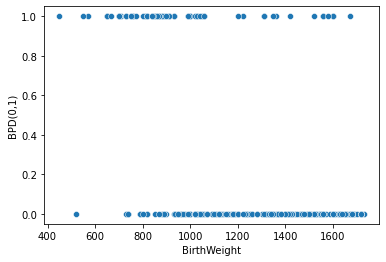

In [234]:
sns.scatterplot(x="BirthWeight",y="BPD(0,1)",data=BPD)

<AxesSubplot:xlabel='BirthWeight', ylabel='BPD(0,1)'>

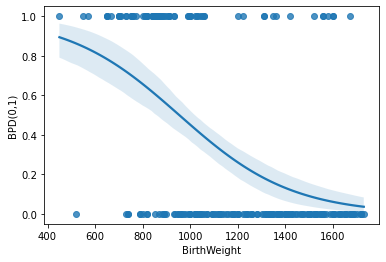

In [235]:
sns.regplot(x="BirthWeight",y="BPD(0,1)",data=BPD,logistic=True)

In [236]:
BPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BPD(0,1)      223 non-null    int64
 1   BirthWeight   223 non-null    int64
 2   GestAge       223 non-null    int64
 3   Toxemia(0,1)  223 non-null    int64
dtypes: int64(4)
memory usage: 7.1 KB


In [237]:
BPD_Y=pd.get_dummies(BPD["BPD(0,1)"],prefix="BPD_Y",drop_first=True)
BPD_Y

,BPD_Y_1
0,1
1,0
2,1
3,0
4,0
...,...
218,1
219,0
220,0
221,0


In [238]:
BPD=pd.concat([BPD,BPD_Y],axis=1)
BPD

,"BPD(0,1)",BirthWeight,GestAge,"Toxemia(0,1)",BPD_Y_1
0,1,850,27,0,1
1,0,1500,33,0,0
2,1,1360,32,0,1
3,0,960,35,1,0
4,0,1560,33,0,0
...,...,...,...,...,...
218,1,700,27,0,1
219,0,1380,33,0,0
220,0,990,30,0,0
221,0,1220,29,0,0


In [240]:
model2_logreg=logit("BPD_Y~BirthWeight",data=BPD)
results2=model2_logreg.fit()
print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.501616
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  BPD_Y   No. Observations:                  223
Model:                          Logit   Df Residuals:                      221
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Mar 2022   Pseudo R-squ.:                  0.2181
Time:                        19:45:57   Log-Likelihood:                -111.86
converged:                       True   LL-Null:                       -143.07
Covariance Type:            nonrobust   LLR p-value:                 2.776e-15
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.0343      0.696      5.798      0.000       2.671       5.398
BirthWeight    -0.0042    

In [241]:
predictionsBPD=results2.predict(exog=dict(BirthWeight=750))
predictionsBPD

0    0.703169
dtype: float64

In [242]:
model3_logreg=logit("BPD_Y~BirthWeight+GestAge",data=BPD)
results3=model3_logreg.fit()
print(results3.summary())

Optimization terminated successfully.
         Current function value: 0.469124
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  BPD_Y   No. Observations:                  223
Model:                          Logit   Df Residuals:                      220
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Mar 2022   Pseudo R-squ.:                  0.2688
Time:                        20:01:13   Log-Likelihood:                -104.61
converged:                       True   LL-Null:                       -143.07
Covariance Type:            nonrobust   LLR p-value:                 1.991e-17
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.8273      2.932      4.716      0.000       8.080      19.574
BirthWeight    -0.0024    

In [246]:
ToxD=pd.get_dummies(BPD["Toxemia(0,1)"],prefix="ToxD",drop_first=True)
ToxD

,ToxD_1
0,0
1,0
2,0
3,1
4,0
...,...
218,0
219,0
220,0
221,0


In [247]:
BPD=pd.concat([BPD,ToxD],axis=1)
BPD

,"BPD(0,1)",BirthWeight,GestAge,"Toxemia(0,1)",BPD_Y_1,ToxD_1
0,1,850,27,0,1,0
1,0,1500,33,0,0,0
2,1,1360,32,0,1,0
3,0,960,35,1,0,1
4,0,1560,33,0,0,0
...,...,...,...,...,...,...
218,1,700,27,0,1,0
219,0,1380,33,0,0,0
220,0,990,30,0,0,0
221,0,1220,29,0,0,0


In [248]:
model4_logreg=logit("BPD_Y~ToxD",data=BPD)
results4=model4_logreg.fit()
print(results4.summary())

Optimization terminated successfully.
         Current function value: 0.635155
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  BPD_Y   No. Observations:                  223
Model:                          Logit   Df Residuals:                      221
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Mar 2022   Pseudo R-squ.:                0.009998
Time:                        20:08:59   Log-Likelihood:                -141.64
converged:                       True   LL-Null:                       -143.07
Covariance Type:            nonrobust   LLR p-value:                   0.09076
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5718      0.149     -3.825      0.000      -0.865      -0.279
ToxD          -0.7719      0.